## Classification

Classification in machine learning is a type of supervised learning where the goal is to predict a category (class/label) for a given input based on its features.

### Examples:

- Email filtering → Classify as Spam or Not Spam.
- Medical diagnosis → Classify if a patient has Diabetes or No Diabetes.
- Image recognition → Classify an image as Dog, Cat, or Rabbit.
- Sentiment analysis → Classify reviews as Positive, Negative, or Neutral.

### Types of Classification Problems

- Binary classification → Two categories (e.g., spam vs. not spam).
- Multi-class classification → More than two categories (e.g., classifying animals: dog, cat, rabbit).
- Multi-label classification → Multiple labels at once (e.g., a movie can be Action and Comedy).

### Key Terminologies

- `Features` (X): The input data (age, income, text, image pixels).
- `Target/Label` (y): The category we want to predict.

### Algorithms for Classification

- Logistic Regression → Probabilities & decision boundary.
- Decision Trees → 
- Random Forest - 
- k-Nearest Neighbors (k-NN) → Based on closest neighbors.
- Naive Bayes 
- Support Vector Machines (SVM) → Find the best separating line.


### How to Deal with Imbalanced Data

#### 1. Data-Level Approaches (Resampling Techniques)

These methods change the dataset before training:

#### a) Oversampling the Minority Class

Duplicate or synthetically generate new samples for the minority class.

SMOTE (Synthetic Minority Oversampling Technique): Creates synthetic points along the line between minority samples.

Helps balance data but may cause overfitting if synthetic samples are too similar.

#### b) Undersampling the Majority Class

Randomly remove samples from the majority class to balance the dataset.

Useful for large datasets, but risk of losing valuable information.

#### 2. Algorithm-Level Approaches

Instead of changing the data, adjust how Logistic Regression learns:

#### a) Class Weights

Give higher weight to the minority class so that the model penalizes misclassifications more heavily.

In sklearn LogisticRegression, you can use:

`model = LogisticRegression(class_weight='balanced')`


### Customer Churn Analysis Prediction

Customer churn occurs when a customer stops using a company’s service lead to revenue loss.

Analyzing churn helps businesses understand why customers leave and how to improve retention.

ML Problem: Binary classification → Churn: Yes/No.

### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder,LabelBinarizer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Understanding the dataset

In [4]:
print("Shape of dataset:", df.shape)

Shape of dataset: (10000, 14)


In [5]:
#  Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# drop unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Exploratory Data Analysis

#### Analyzing Churn Distribution

We check the number of churners and non-churners to understand the balance of the dataset.

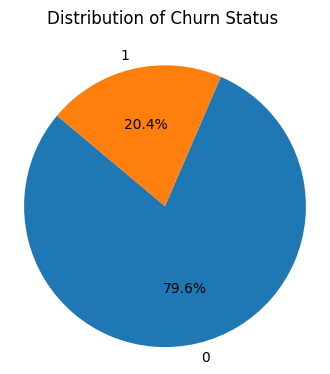

In [9]:
plt.figure(figsize=(4,4))
output_counts = df['Exited'].value_counts()
plt.pie(output_counts, labels=output_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Distribution of Churn Status \n')
plt.ylabel('')

plt.show()

#### Distribution of numerical columns

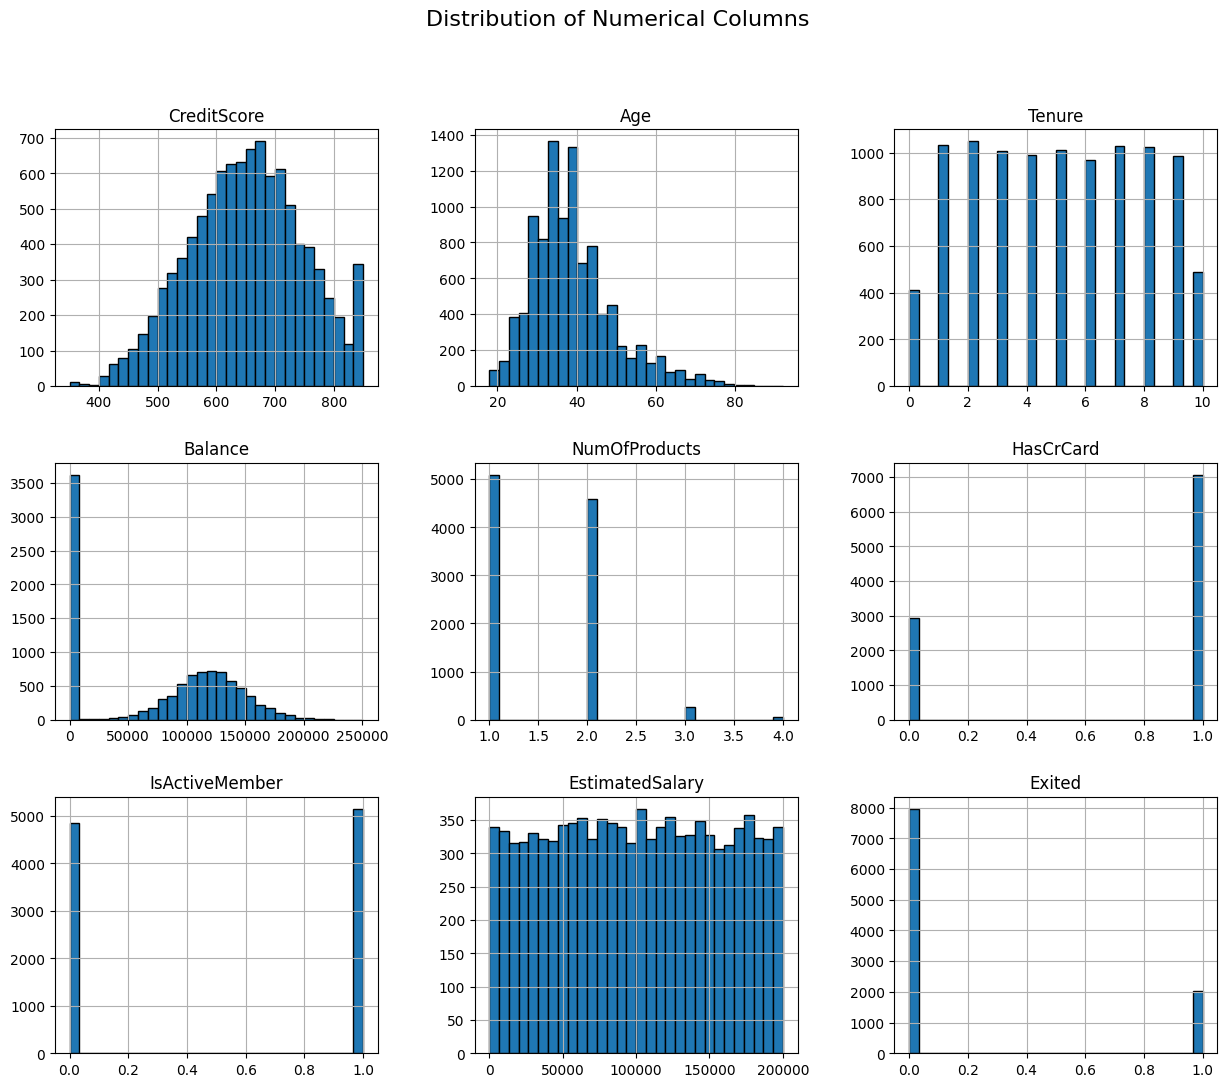

In [10]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
df[num_cols].hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.suptitle("Distribution of Numerical Columns", fontsize=16)
plt.show()

### Observations from the Distributions

#### CreditScore
- Roughly normal distribution, centered around 600–700.  
**StandardScaler** is a good choice here (since it works well with Gaussian-like distributions).

#### Age
- Right-skewed (most customers are 30–40, fewer above 60).  
**RobustScaler** is better than StandardScaler because it handles skewness/outliers.

#### Balance
- Strongly skewed, with many at 0 and spread across the range.  
**RobustScaler** is best here (less sensitive to extreme values than MinMax).

#### EstimatedSalary
- Almost uniform distribution.  
**MinMaxScaler** is fine (it rescales uniformly distributed features smoothly).

#### Tenure
- Discrete uniform between 0–10.  
**MinMaxScaler** is fine (values are bounded and not heavily skewed).

#### NumOfProducts
- Categorical-looking (1, 2, few with 3, 4).  
Might be better treated as **categorical (One-Hot Encode)** instead of scaling.

#### HasCrCard, IsActiveMember
- Binary/dummy variables (0/1).  
**No scaling needed.**


Box plot for numerical features:


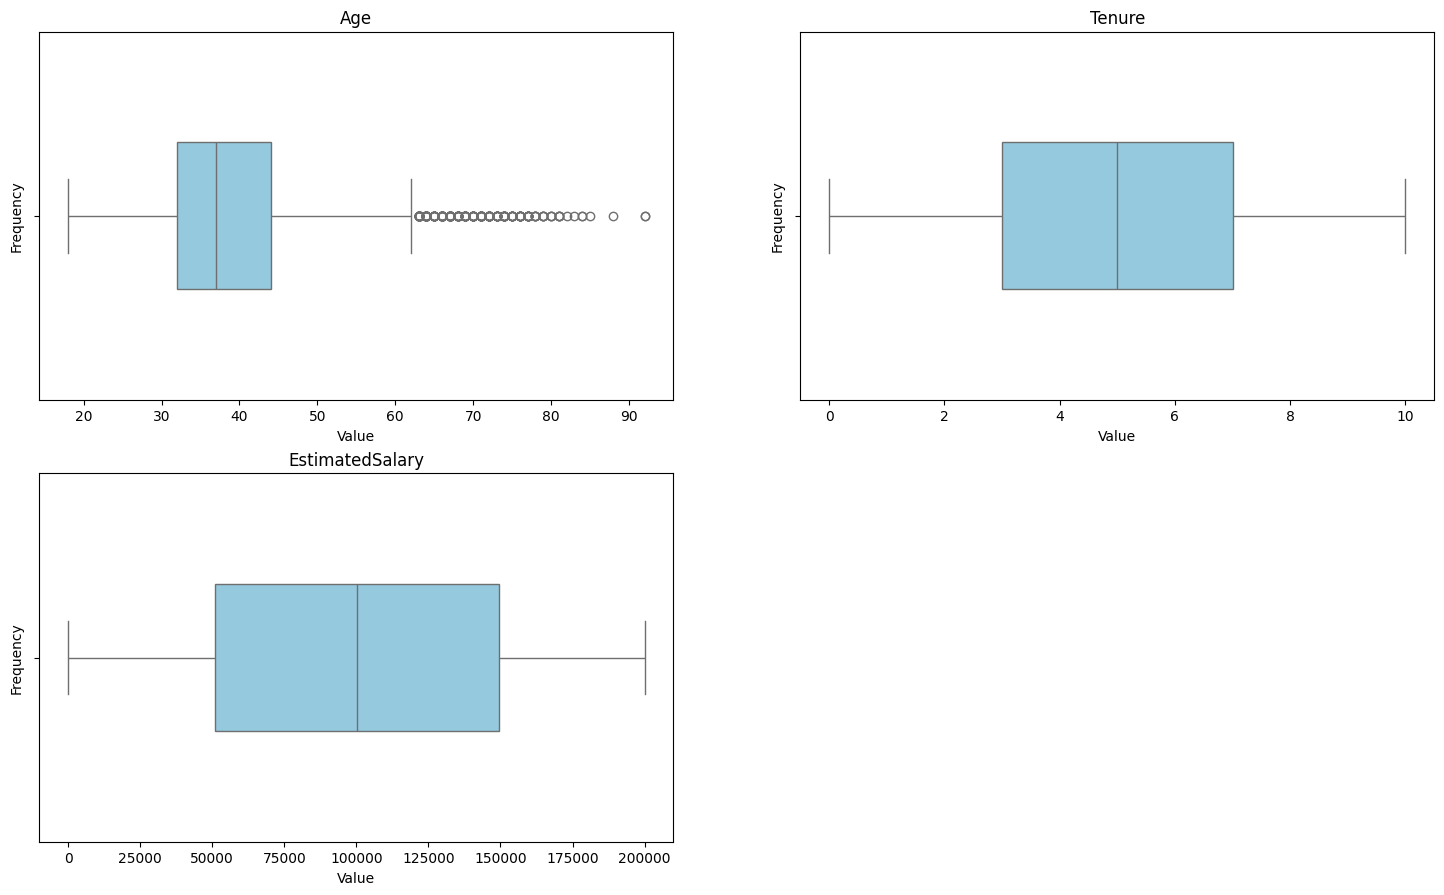

In [11]:
print("Box plot for numerical features:")
plt.figure(figsize=(18,22))
numeric_features = ['Age','Tenure','EstimatedSalary']
for i, column in enumerate(numeric_features):
    plt.subplot(4,2, i + 1)
    sns.boxplot(x=df[column], color='skyblue', width=0.4)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

#### Observation:
It does not look like there are many outliers in the numerical features, except Age - but we can't do much about it

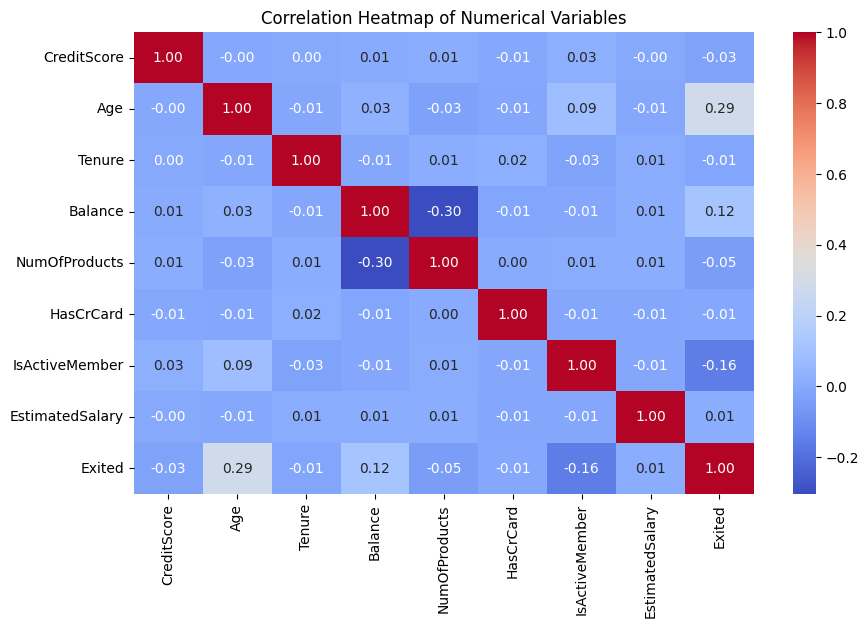

In [12]:
plt.figure(figsize=(10, 6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

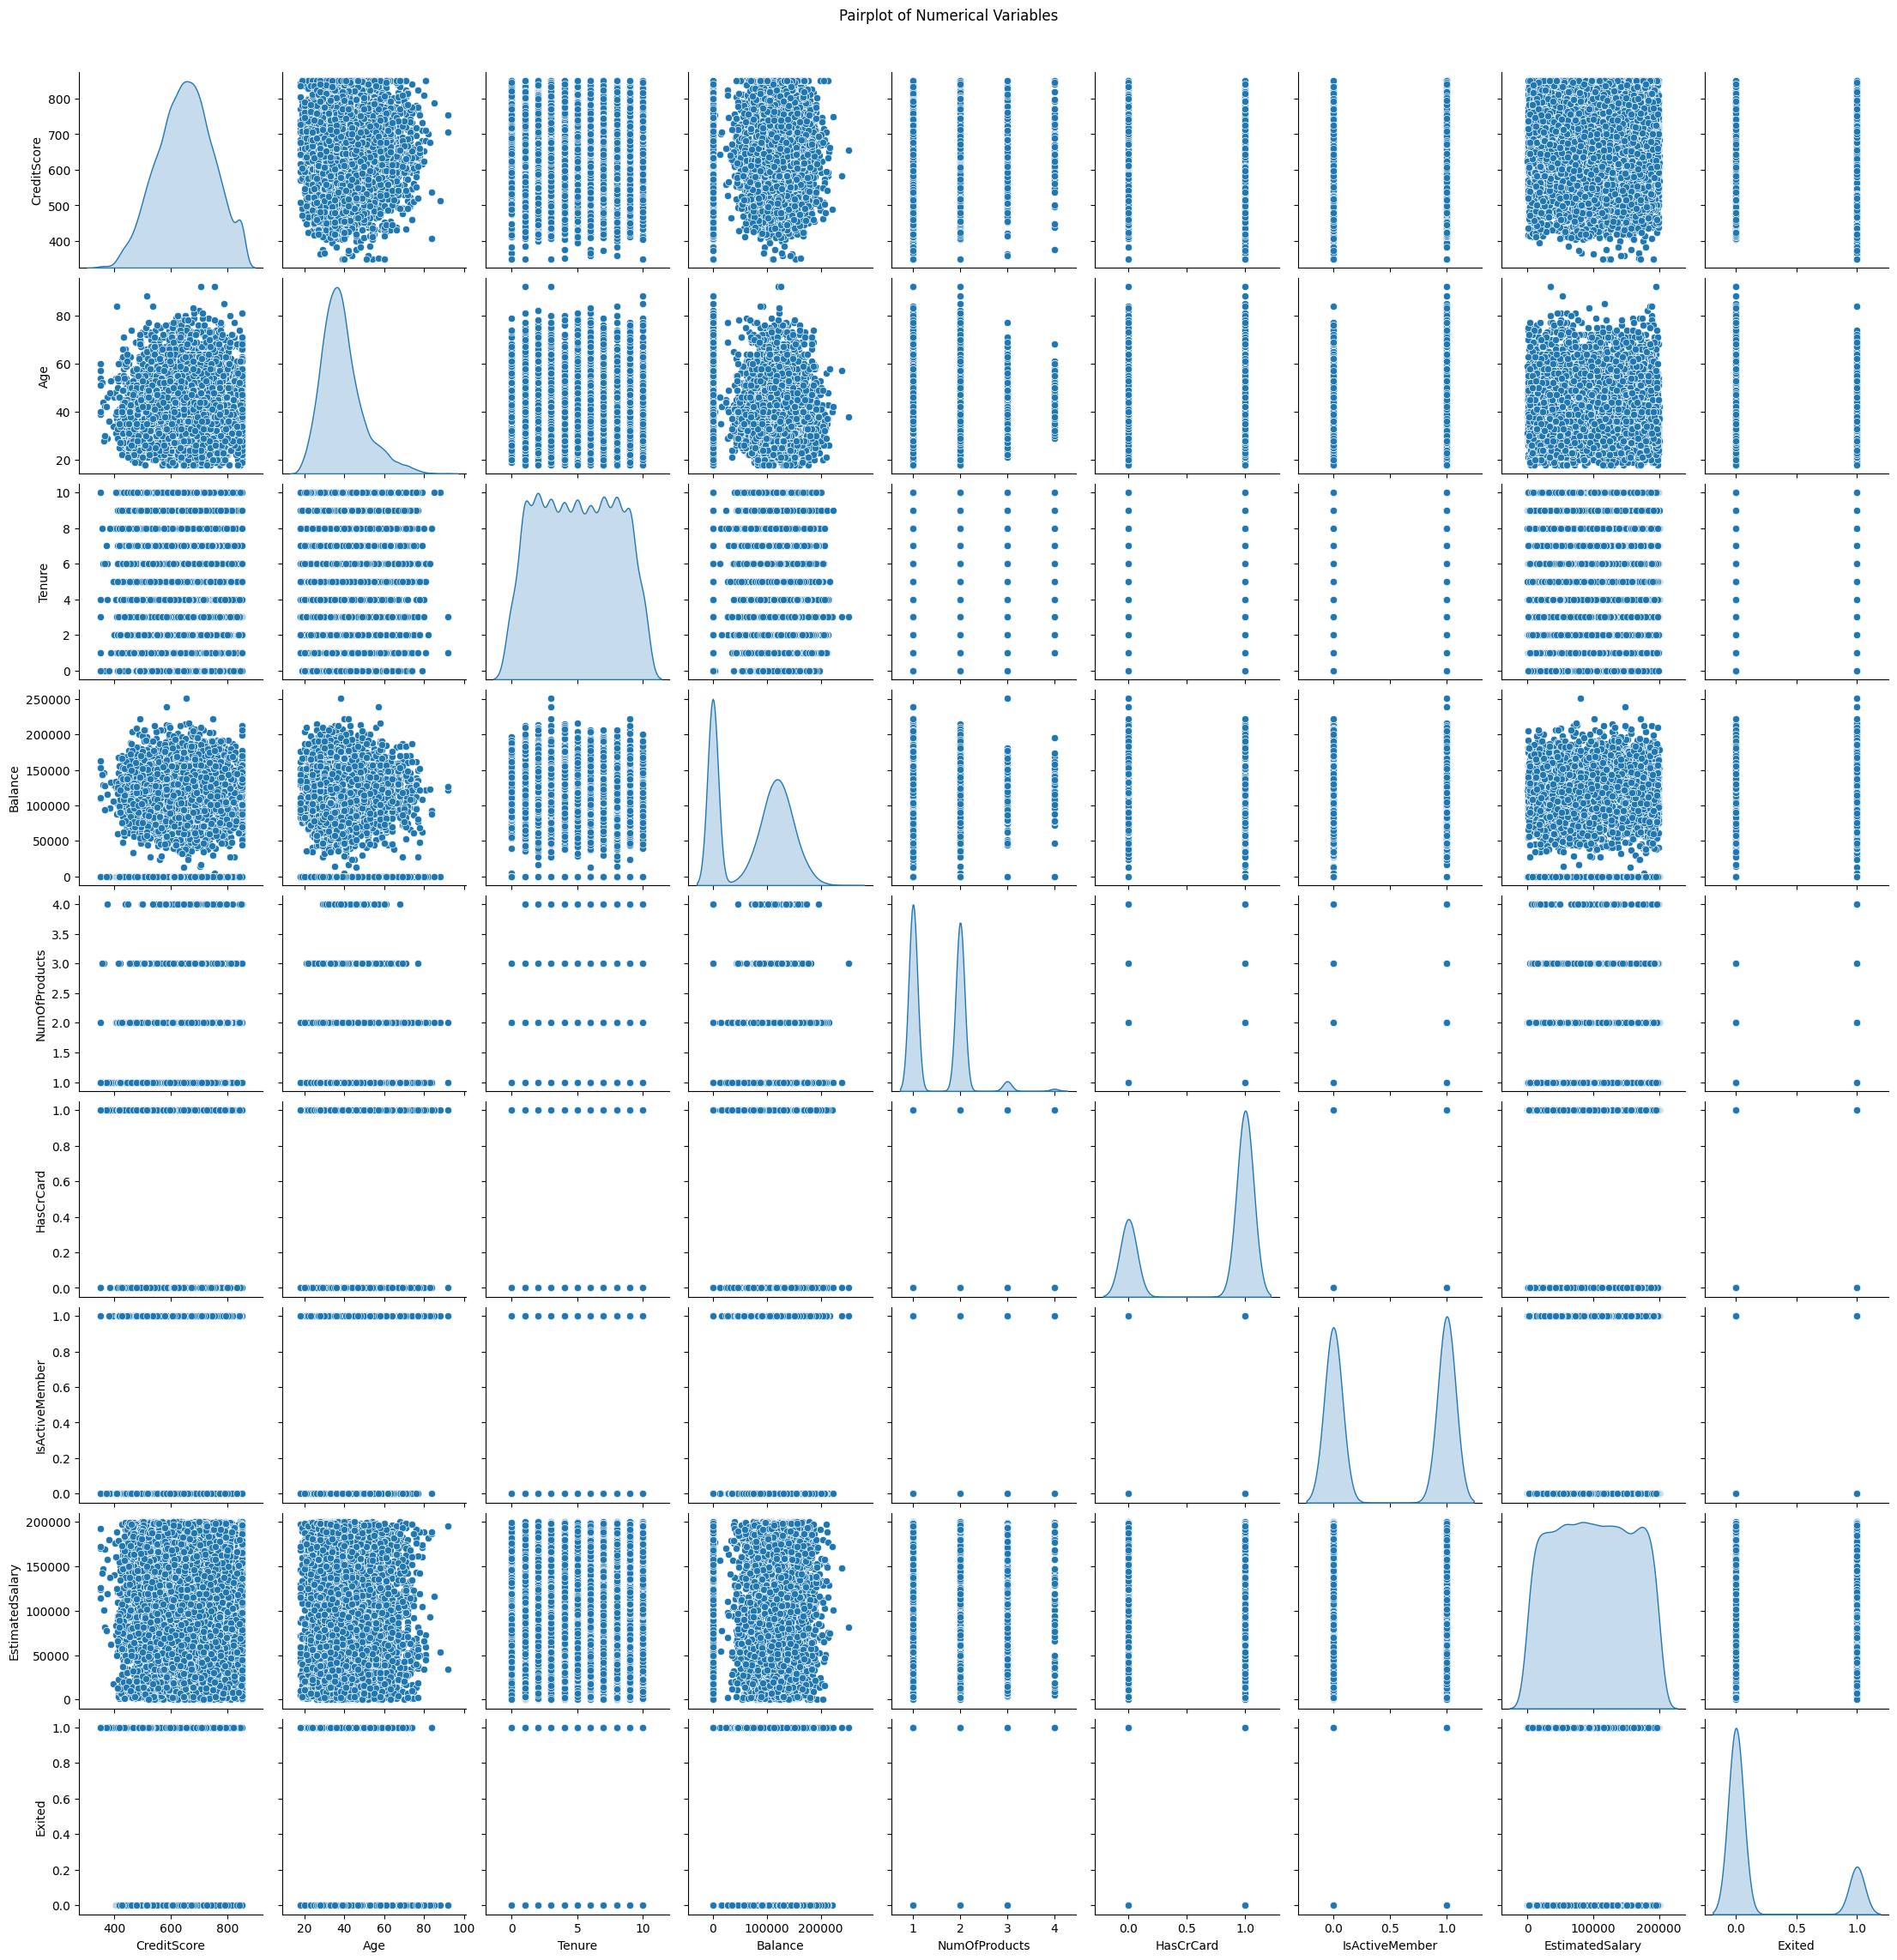

In [13]:
# Pairplot with different colors based on target
sns.pairplot(df[num_cols], diag_kind="kde") 
plt.suptitle("Pairplot of Numerical Variables", y=1.02) 
plt.show()

Count plot for categorical features:


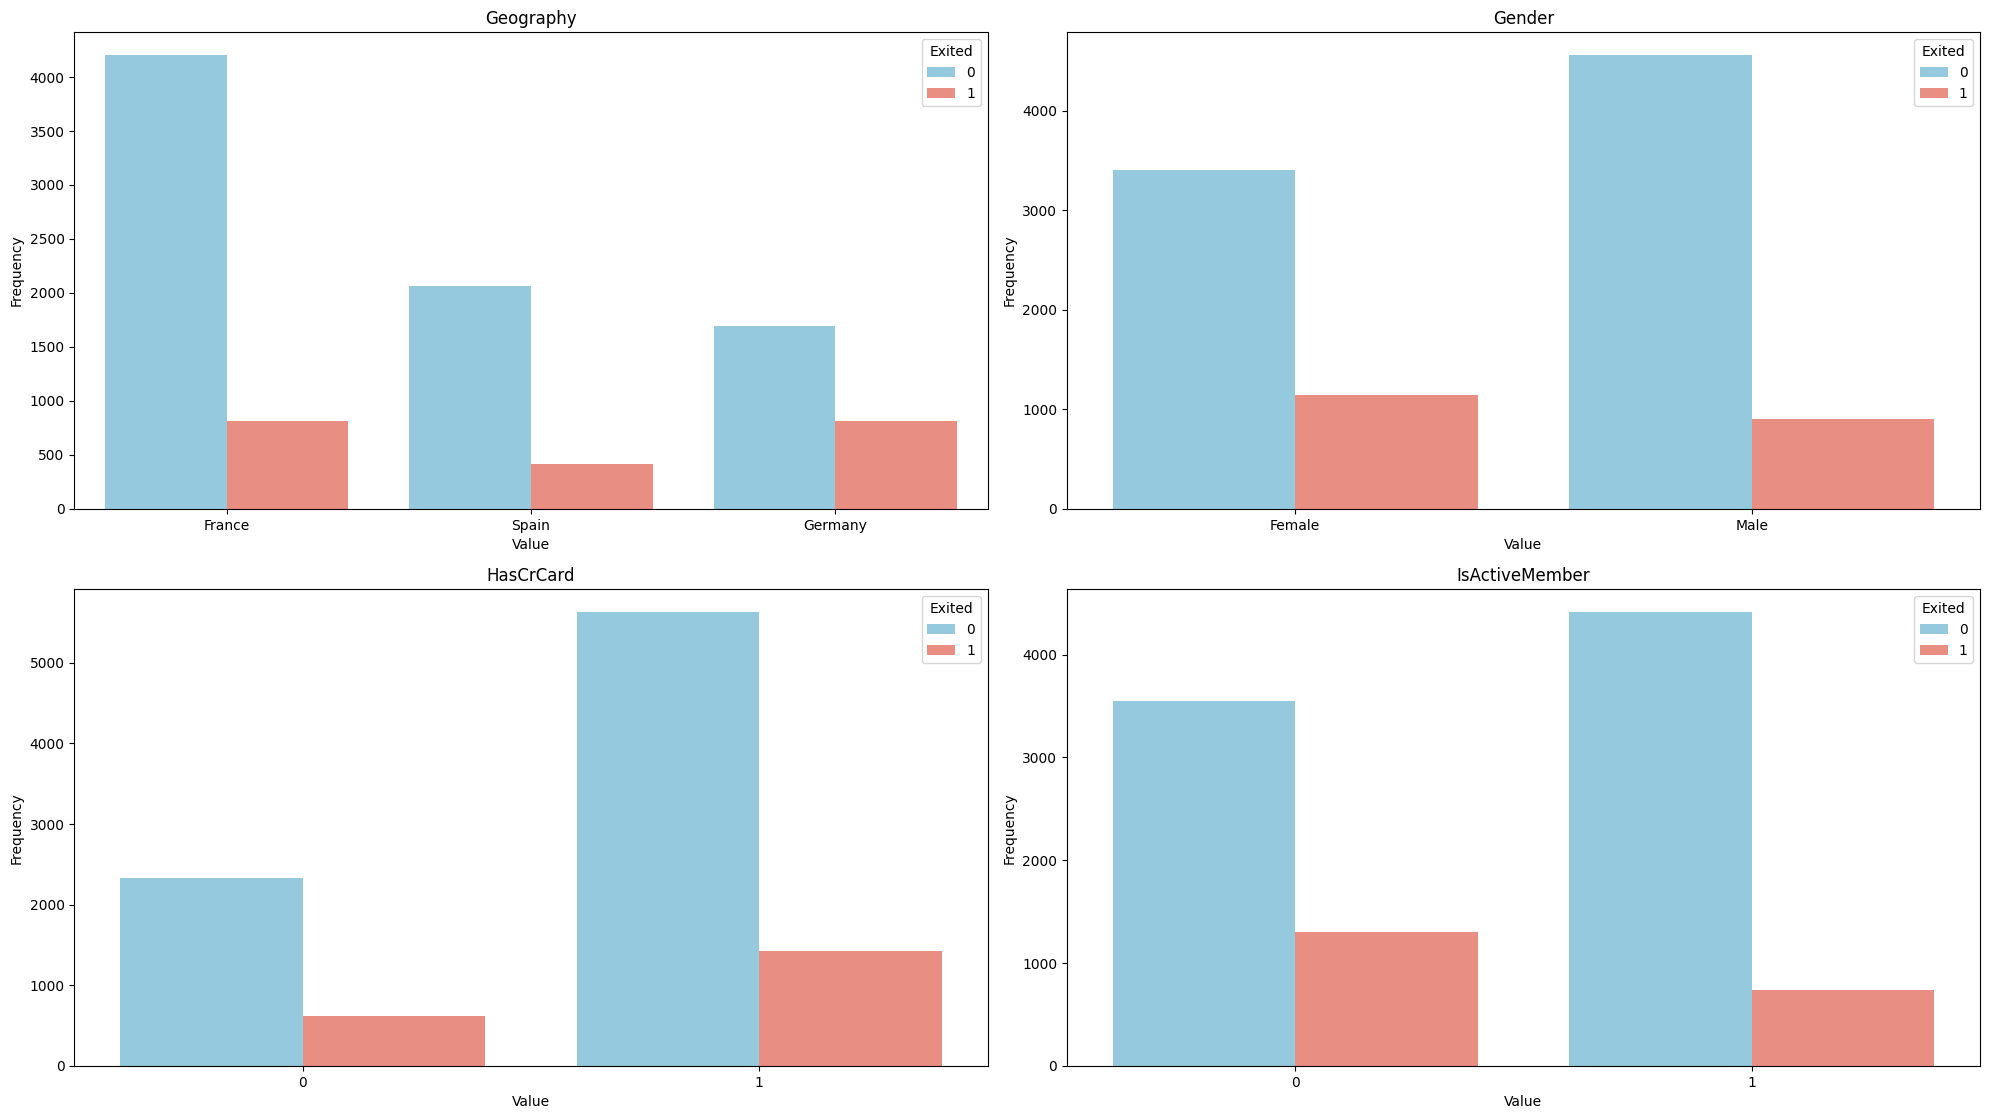

In [14]:
print("Count plot for categorical features:")
plt.figure(figsize=(20,22))

# Assuming 'Target' is the column with 0 and 1 values
for i, column in enumerate(['Geography','Gender','HasCrCard','IsActiveMember']):
    plt.subplot(4,2,i + 1)
    sns.countplot(x=column, hue='Exited', data=df, palette={0: 'skyblue', 1: 'salmon'})
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Observation:

The count plots indicate that there are more customers from France than Spain or Germany, the gender distribution is nearly balanced, most customers have a credit card, and there is a higher proportion of active members

Observing independent variables based on the Exited Column:


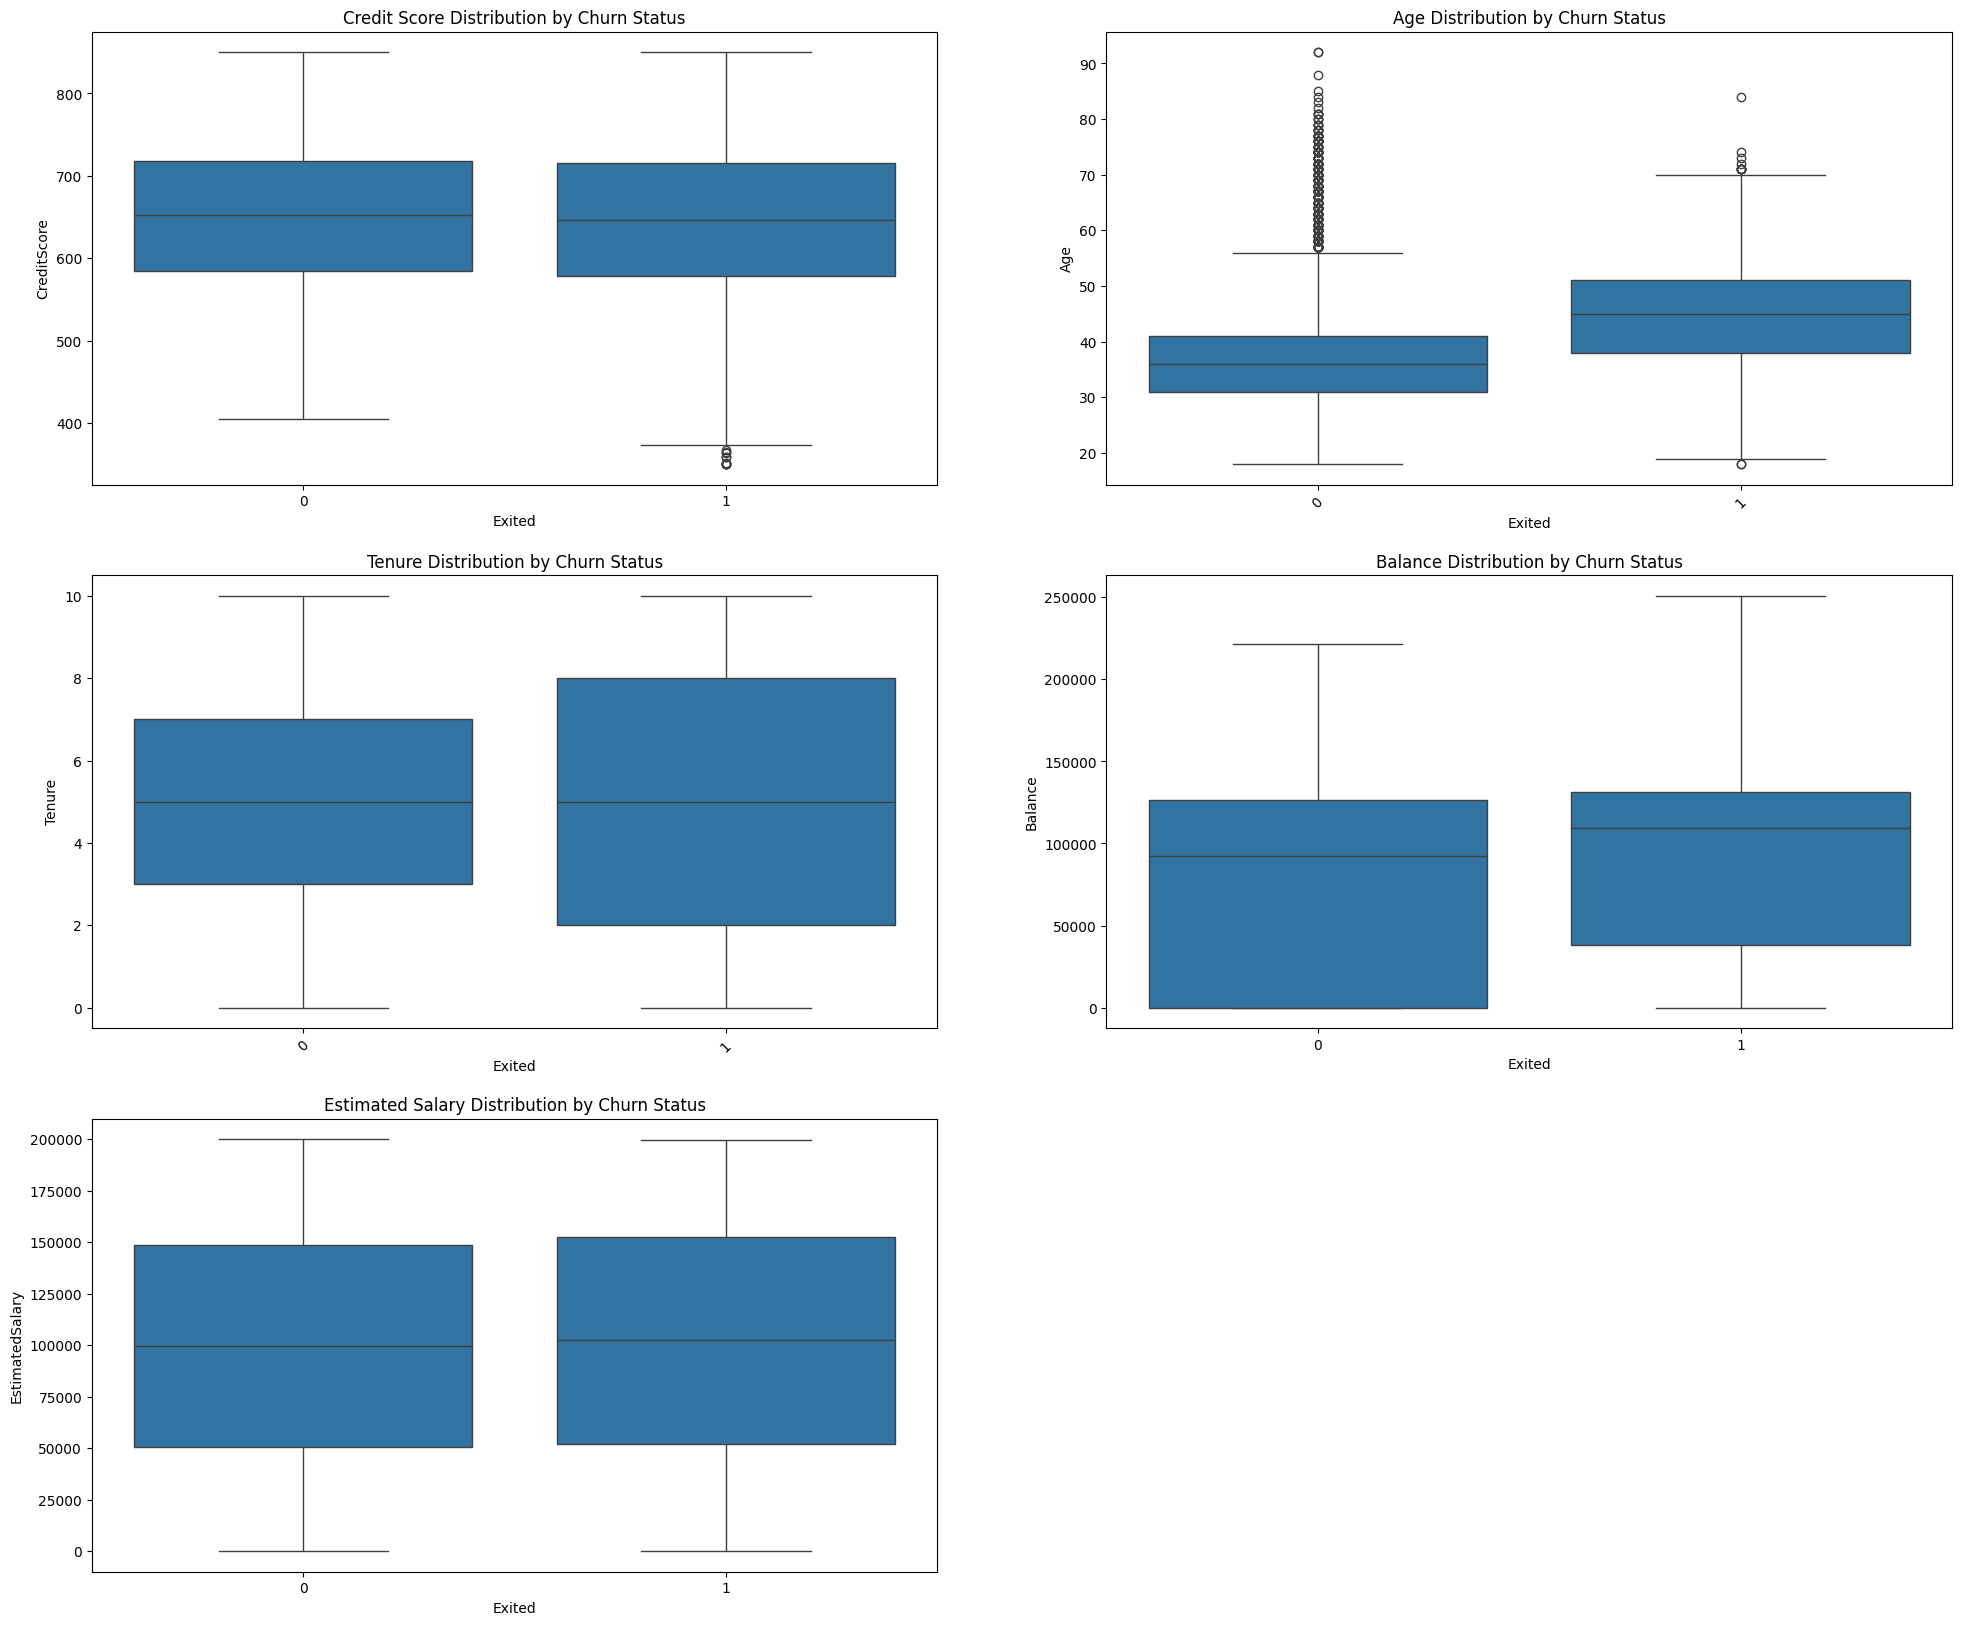

In [15]:
print("Observing independent variables based on the Exited Column:")

fig, axes = plt.subplots(3,2, figsize=(24,20))

sns.boxplot(data=df, y='CreditScore', x ='Exited',  ax=axes[0,0])
axes[0,0].set_title('Credit Score Distribution by Churn Status')

sns.boxplot(data=df, y='Age', x ='Exited', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Churn Status')
axes[0,1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, y='Tenure', x ='Exited', ax=axes[1,0])
axes[1,0].set_title('Tenure Distribution by Churn Status')
axes[1,0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, y='Balance', x ='Exited', ax=axes[1,1])
axes[1,1].set_title('Balance Distribution by Churn Status')

sns.boxplot(data=df, y='EstimatedSalary', x= 'Exited', ax=axes[2,0])
axes[2,0].set_title('Estimated Salary Distribution by Churn Status')

axes[2,1].axis('off')
plt.show()

#### Observation:
The credit score distribution between customers who churned and those who did not churn is similar, indicating that the credit score may not be a strong predictor of churn.

The tenure distribution suggests that customers with a shorter tenure are slightly more likely to churn than those with a longer tenure.

Age distribution shows a more pronounced difference - older customers appear more likely to churn than younger ones.

Lastly, the balance distribution is significantly different, with churned customers having higher balances on average. This could indicate that customers with higher balances are at a higher risk of churn.

The estimated salary distribution does not show a stark difference between the churned and retained customers, suggesting that salary may not be a primary factor in the decision to churn.

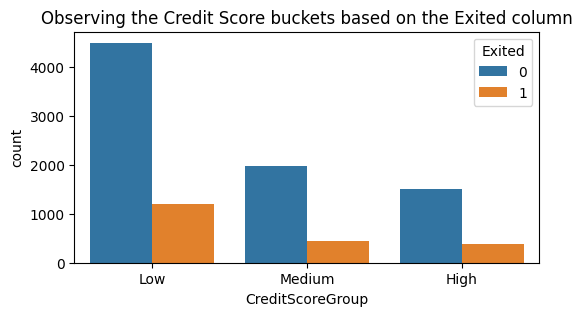

In [16]:
bins = [0,669,739,850]
labels = ['Low','Medium','High']

df['CreditScoreGroup'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(6,3))
sns.countplot(x = 'CreditScoreGroup', hue = 'Exited', data = df)
plt.title('Observing the Credit Score buckets based on the Exited column')
plt.show()

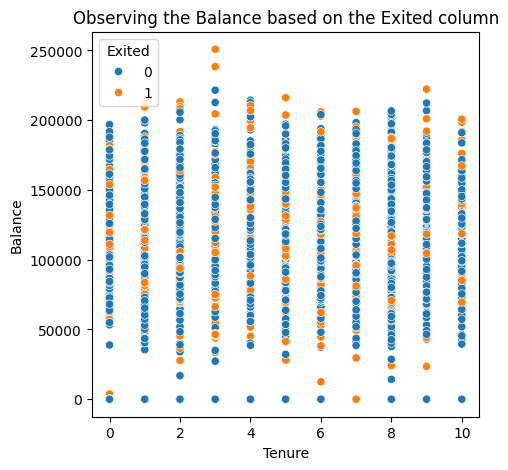

In [17]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Tenure', y='Balance', hue='Exited', data=df)
plt.title('Observing the Balance based on the Exited column')
plt.show()

#### Observation:

The scatter plot indicates that there is no clear pattern or correlation between tenure and balance for both churned and retained customers, implying these factors independently do not strongly predict customer churn

### Feature Engineering

#### *Exploring the relationship between features*

a. **Credit Utilization**: Ratio of balance to credit score. It can give an insight into how much of the available credit the customer is using

b. **Interaction Score**: A composite score based on the number of products, active membership, and credit card possession which can give a holistic view of a customer's engagement with the bank. Higher engagement levels might be associated with lower churn rates

c. **Balance To Salary Ratio**: Ratio of the customer's balance to their estimated salary. This feature can indicate how significant the customer's balance is in relation to their income

d. **Credit Score Age Interaction**: An interaction term between credit score and age to explore if the impact of credit score on churn varies across different age groups

In [18]:
df['CreditUtilization']=df['Balance']/df['CreditScore']

df['InteractionScore']=df['NumOfProducts']+df['HasCrCard']+df['IsActiveMember']

df['BalanceToSalaryRatio']=df['Balance']/df['EstimatedSalary']

df['CreditScoreAgeInteraction']=df['CreditScore']*df['Age']

### Encoding 

In [19]:
cat_col = ['Geography','Gender','CreditScoreGroup']

print("Observing the categorical column disribution before encoding: \n")
for columns in cat_col:
    print(columns, '\n')
    print(df[columns].value_counts(),'\n')

Observing the categorical column disribution before encoding: 

Geography 

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64 

Gender 

Gender
Male      5457
Female    4543
Name: count, dtype: int64 

CreditScoreGroup 

CreditScoreGroup
Low       5693
Medium    2428
High      1879
Name: count, dtype: int64 



In [20]:
# Label Encoding for Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [21]:
# Ordinal Encoding for CreditScoreGroup
# Define the order explicitly
df['CreditScoreGroup'] = df['CreditScoreGroup'].astype(str)
ord_enc = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df['CreditScoreGroup'] = ord_enc.fit_transform(df[['CreditScoreGroup']])

In [22]:
# One-Hot Encoding for Geography using sklearn
ohe = OneHotEncoder(drop='first', sparse_output=False)
geo_encoded = ohe.fit_transform(df[['Geography']])

In [23]:
# Convert to DataFrame with column names
geo_encoded_df = pd.DataFrame(geo_encoded, 
                              columns=ohe.get_feature_names_out(['Geography']),
                              index=df.index)

In [24]:
# Drop original Geography and concatenate
df = pd.concat([df.drop('Geography', axis=1), geo_encoded_df], axis=1)

In [25]:
print("\nDataFrame after Encoding:")
df.head()


DataFrame after Encoding:


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreGroup,CreditUtilization,InteractionScore,BalanceToSalaryRatio,CreditScoreAgeInteraction,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.0,0.000000,3,0.000000,25998,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,137.841875,2,0.744677,24928,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0.0,318.049402,4,1.401375,21084,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.000000,2,0.000000,27261,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,2.0,147.659788,3,1.587055,36550,0.0,1.0


### Train-test split

In [27]:
# Drop unused columns
col_drop = ['Exited']
X = df.drop(col_drop, axis=1)
y = df['Exited']

# Train-test split BEFORE scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [28]:
# Print dataset shapes
print("Training dataset shape:", X_train.shape, y_train.shape)
print("Test dataset shape:", X_test.shape, y_test.shape)

Training dataset shape: (7000, 16) (7000,)
Test dataset shape: (3000, 16) (3000,)


### Feature Scaling

In [29]:
# Define scalers
scaler_standard = StandardScaler()
scaler_robust = RobustScaler()
scaler_minmax = MinMaxScaler()

# Define which features use which scaler (based on EDA)
standard_cols = ['CreditScore', 'Age']          # approx normal
robust_cols   = ['Balance', 'EstimatedSalary']  # skewed / outliers
minmax_cols   = ['Tenure', 'NumOfProducts']     # bounded features

# Preprocessor: different scalers for different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_cols),
        ('robust', RobustScaler(), robust_cols),
        ('minmax', MinMaxScaler(), minmax_cols)
    ]
)

### Model Training

Synthetic Minority Over-sampling Technique. It generates synthetic samples of the minority class to balance the dataset.

scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train): Adjusts for class imbalance. 

Formula: (# negative samples / # positive samples).

In [30]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'K-Nearest Neighbors': make_pipeline_imb(SMOTE(random_state=42), KNeighborsClassifier()),
    'Support Vector Machine': make_pipeline_imb(SMOTE(random_state=42), SVC(probability=True, random_state=42)),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train), random_state=42),
    'Gradient Boosting': make_pipeline_imb(SMOTE(random_state=42), GradientBoostingClassifier(random_state=42))
}

trained_models = {}

for name, model in models.items():
    print(f"Training {name}...")
    
    # If model already has SMOTE pipeline
    if "SMOTE" in str(model):
        clf = make_pipeline_imb(preprocessor, model)
    else:
        clf = make_pipeline(preprocessor, model)

    # Fit model
    clf.fit(X_train, y_train)

    # Store trained pipeline
    trained_models[name] = clf


Training Logistic Regression...
Training Random Forest...
Training K-Nearest Neighbors...
Training Support Vector Machine...
Training XGBoost...
Training Gradient Boosting...


### Model Evaluation

- `Accuracy`: (correct predictions / total predictions)
- `Precision`: (True Positives / (True Positives + False Positives)) → How many predicted positives were actually positive.
- `Recall`: (True Positives / (True Positives + False Negatives)) → How many actual positives were detected.
- `F1 score`: Harmonic mean of precision and recall.

In [31]:
# Dictionary to store evaluation results
results = {}

for name, model in trained_models.items():
    print(f"\nEvaluating {name}...")
    
    # Predictions on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    
    # Testing scores
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Store results
    results[name] = {
        'Train Accuracy': train_accuracy,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Train F1': train_f1,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1': test_f1
    }

# Convert to DataFrame for better visualization
results_df = pd.DataFrame(results).T
display(results_df)


Evaluating Logistic Regression...

Evaluating Random Forest...

Evaluating K-Nearest Neighbors...

Evaluating Support Vector Machine...

Evaluating XGBoost...

Evaluating Gradient Boosting...


,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1
Logistic Regression,0.696000,0.362891,0.651473,0.466131,0.715667,0.390200,0.703764,0.502043
Random Forest,1.000000,1.000000,1.000000,1.000000,0.834667,0.682540,0.351882,0.464363
K-Nearest Neighbors,0.822286,0.536111,0.947405,0.684744,0.694333,0.352031,0.595745,0.442553
Support Vector Machine,0.767143,0.453211,0.692847,0.547976,0.767333,0.453674,0.697218,0.549677
XGBoost,0.950857,0.818610,0.974755,0.889885,0.795333,0.497942,0.594108,0.541791
Gradient Boosting,0.828714,0.577900,0.590463,0.584114,0.831667,0.583072,0.608838,0.595677


### Model-by-Model Analysis

#### 1. Logistic Regression
- Train Accuracy: 0.696 | Test Accuracy: 0.716  
- Precision, recall, and F1 are fairly balanced between train and test.  
- The model demonstrates good generalization with no serious overfitting. It is simple but stable.  

#### 2. Random Forest
- Train Accuracy: 1.00 | Test Accuracy: 0.835  
- Training scores are perfect (1.0), but test scores drop significantly (especially Recall = 0.35).  
- This indicates overfitting, as the model memorized the training data but struggles with unseen data.  

#### 3. K-Nearest Neighbors
- Train Accuracy: 0.822 | Test Accuracy: 0.694  
- High training recall (0.95) compared to lower test recall (0.59).  
- The model shows some overfitting, though not as extreme as Random Forest. The gap between training and test suggests the model is too tailored to the training data.  

#### 4. Support Vector Machine
- Train Accuracy: 0.767 | Test Accuracy: 0.767  
- Scores are nearly identical between training and testing.  
- This reflects a well-balanced model that is neither overfitting nor underfitting, demonstrating stability.  

#### 5. XGBoost
- Train Accuracy: 0.951 | Test Accuracy: 0.795  
- Very high training scores (near-perfect) but noticeable performance drop on the test set.  
- This indicates overfitting, though it generalizes slightly better than Random Forest.  

#### 6. Gradient Boosting
- Train Accuracy: 0.829 | Test Accuracy: 0.832  
- Training and testing metrics are very close, with balanced precision and recall.  
- The model shows good generalization and strong overall performance.  

---

#### Overall Observations
- Overfitting models: Random Forest, XGBoost, and K-Nearest Neighbors.  
- Stable and generalizing models: Logistic Regression, Support Vector Machine, and Gradient Boosting.  
- Gradient Boosting offers the best tradeoff, with balanced precision/recall and stability across both training and testing data.  
- Random Forest and XGBoost are powerful models but require tuning or regularization (e.g., limiting tree depth, adjusting learning rate, or using fewer estimators) to mitigate overfitting.  


### Error Analysis


Support Vector Machine Error Analysis

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.84      2389
           1       0.45      0.70      0.55       611

    accuracy                           0.77      3000
   macro avg       0.68      0.74      0.70      3000
weighted avg       0.82      0.77      0.78      3000



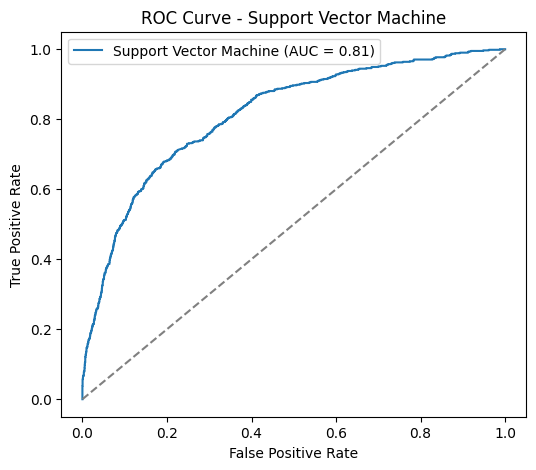


Gradient Boosting Error Analysis

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2389
           1       0.58      0.61      0.60       611

    accuracy                           0.83      3000
   macro avg       0.74      0.75      0.74      3000
weighted avg       0.83      0.83      0.83      3000



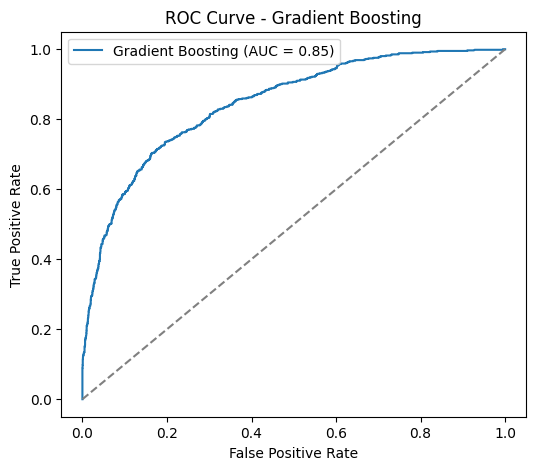

In [37]:
from sklearn.metrics import classification_report, roc_curve, auc

# Selected models
selected_models = {
    "Support Vector Machine": trained_models['Support Vector Machine'],
    "Gradient Boosting": trained_models['Gradient Boosting']
}

for name, model in selected_models.items():
    print(f"\n{name} Error Analysis")
    print("="*40)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # 1. Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # 2. ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    plt.show()


- `False Negatives (FN)` = Customers who churned but model predicted no churn → these are the most costly mistakes for the business.

- `False Positives (FP)` = Customers predicted to churn but actually stayed → less costly, but still wastes retention effort.

### Which Customers are Misclassified?


Support Vector Machine Detailed Error Analysis


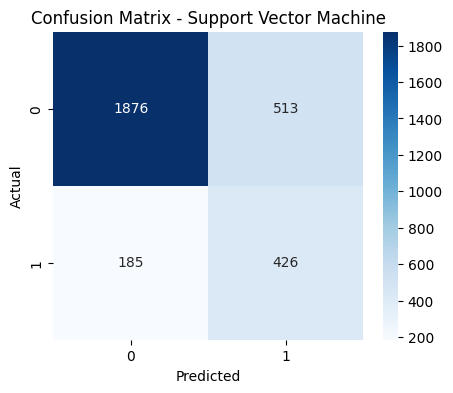

Number of misclassified samples: 698
Sample of misclassified indices: [1071, 6533, 5724, 4475, 5741, 4911, 2166, 7927, 2492, 3593]

Threshold = 0.3
[[1435  954]
 [  91  520]]

Threshold = 0.5
[[1832  557]
 [ 174  437]]

Threshold = 0.7
[[2108  281]
 [ 268  343]]

Gradient Boosting Detailed Error Analysis


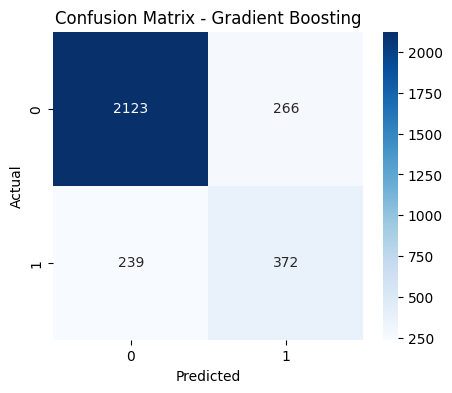

Number of misclassified samples: 505
Sample of misclassified indices: [1071, 9018, 7327, 5741, 4911, 8807, 1010, 2166, 7927, 2492]

Threshold = 0.3
[[1754  635]
 [ 137  474]]

Threshold = 0.5
[[2123  266]
 [ 239  372]]

Threshold = 0.7
[[2319   70]
 [ 402  209]]


In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

for name, model in selected_models.items():
    print(f"\n{name} Detailed Error Analysis")
    print("="*50)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # 1. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # 2. Misclassified Samples
    misclassified_idx = X_test.index[y_test != y_pred]
    print(f"Number of misclassified samples: {len(misclassified_idx)}")
    if len(misclassified_idx) > 0:
        print("Sample of misclassified indices:", misclassified_idx[:10].tolist())

    # 3. Threshold Analysis
    thresholds = [0.3, 0.5, 0.7]  # Example thresholds
    for thresh in thresholds:
        y_thresh_pred = (y_pred_proba >= thresh).astype(int)
        cm_thresh = confusion_matrix(y_test, y_thresh_pred)
        print(f"\nThreshold = {thresh}")
        print(cm_thresh)
